In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.svm import LinearSVC

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data"
df = pd.read_csv(url, header= None, names=['Age','year_operation','positive_nodes','class'])
df

,Age,year_operation,positive_nodes,class
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [ ]:
url2 = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
df2 = pd.read_csv(url2, header=None, names=['Pregnancies','Glucose','Bloodpressure','SkinThickness','Insulin', 'BMI', 'DiabetesPedigree','Age', 'Outcome'])
df2

,Pregnancies,Glucose,Bloodpressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


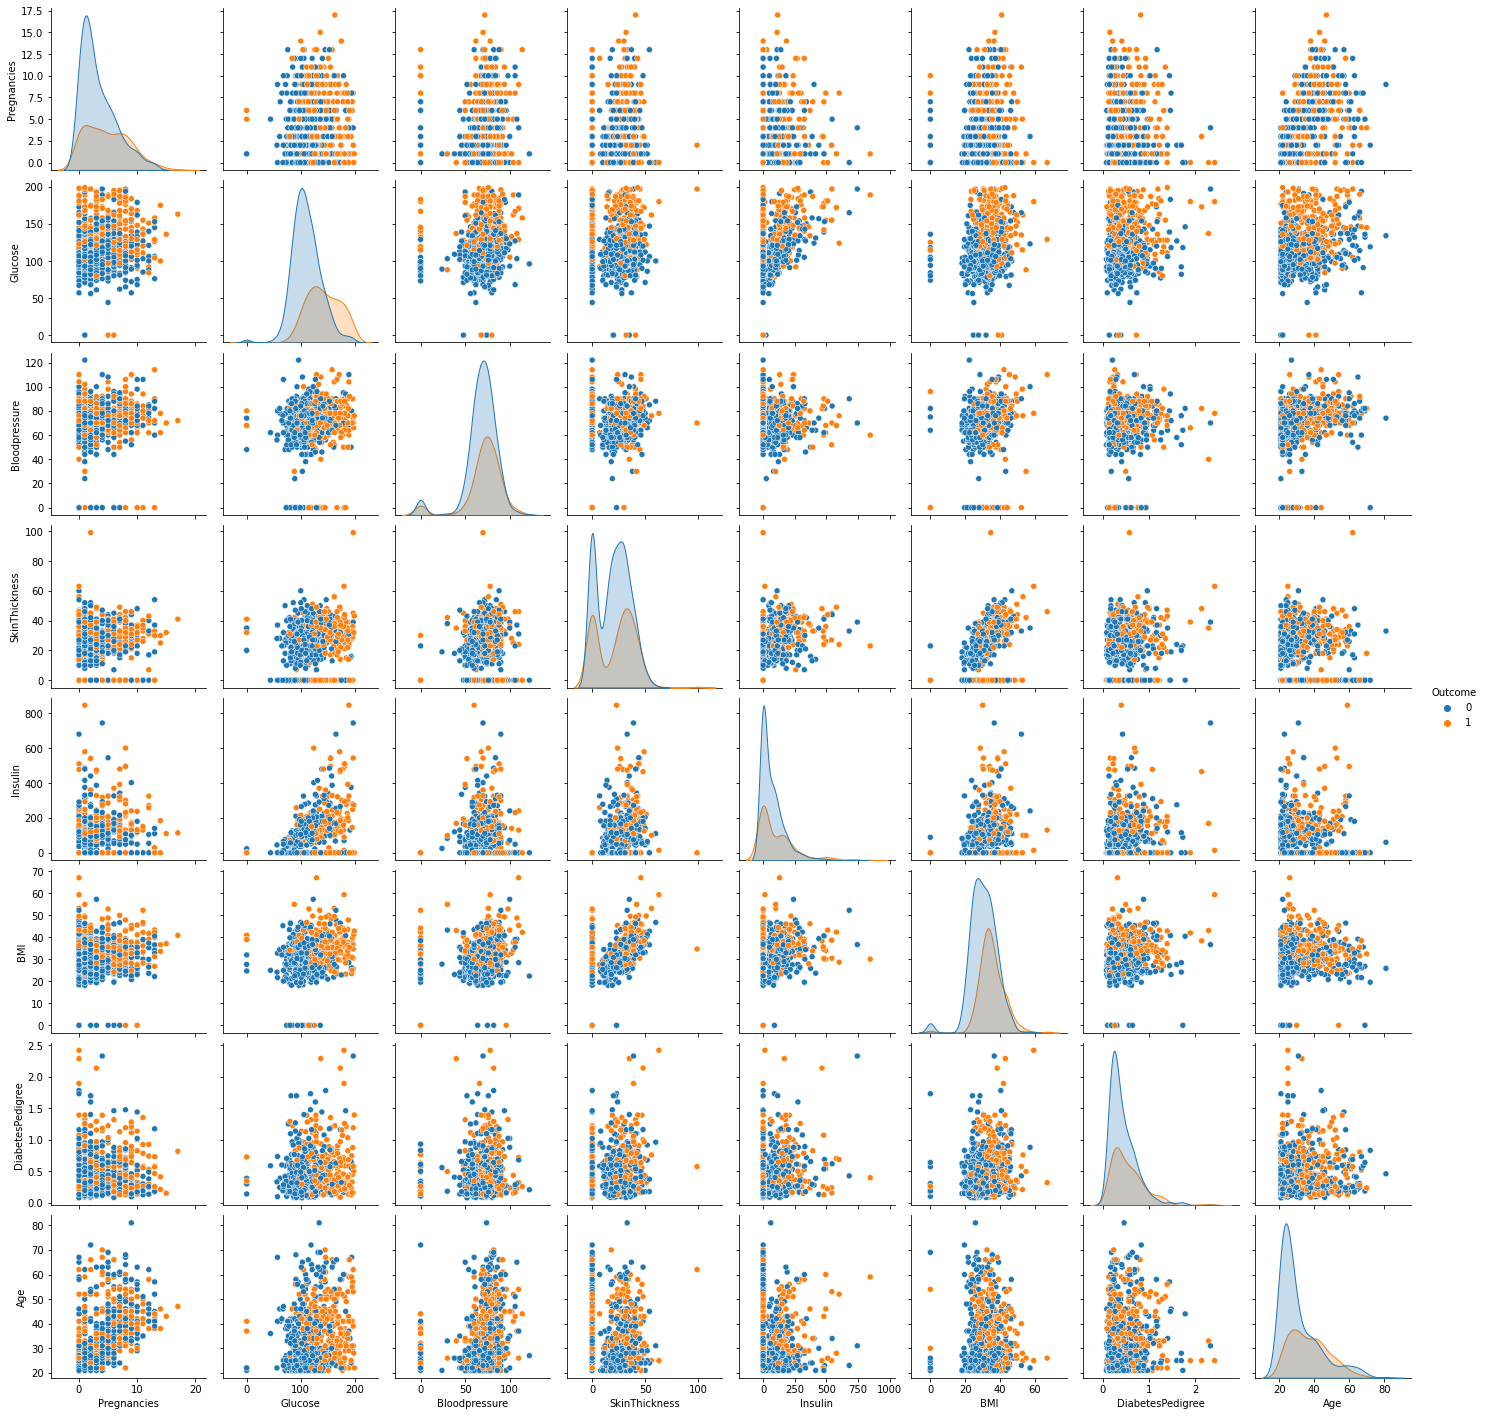

In [ ]:
sns.pairplot(df2, hue='Outcome')

In [ ]:
df2.info()
total = df2.isnull().sum().sort_values(ascending=False)
percent_1 = df2.isnull().sum()/df2.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(df2.size)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Pregnancies       768 non-null    int64  
 1   Glucose           768 non-null    int64  
 2   Bloodpressure     768 non-null    int64  
 3   SkinThickness     768 non-null    int64  
 4   Insulin           768 non-null    int64  
 5   BMI               768 non-null    float64
 6   DiabetesPedigree  768 non-null    float64
 7   Age               768 non-null    int64  
 8   Outcome           768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Total,%
Pregnancies,0,0.0
Glucose,0,0.0
Bloodpressure,0,0.0
SkinThickness,0,0.0
Insulin,0,0.0
BMI,0,0.0
DiabetesPedigree,0,0.0
Age,0,0.0
Outcome,0,0.0


In [ ]:
X = df2.drop('Outcome', axis=1).values
Y = df2['Outcome'].values
Y = Y.reshape(-1,1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(537, 8)
(231, 8)
(537, 1)
(231, 1)


In [ ]:
svc = LinearSVC(C=150,loss="hinge")
svc.fit(X_train,Y_train, sample_weight=1000)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC(C=150, loss='hinge')

In [ ]:
Y_pred = svc.predict(X_test)
print(Y_pred)

[1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 1]


In [ ]:
porcentaje_acierto = 1-mean_squared_error(Y_test,Y_pred)
print(porcentaje_acierto)

0.7272727272727273
